In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import Counter,defaultdict
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [5]:
# Define file path
daigt_train_essays_path = '/Users/adong/Desktop/course/6140/CS6140-MUGC-project/essay/data/DAIGT_V2/train_v2_drcat_02.csv'

# Load the data
df_daigt_train = pd.read_csv(daigt_train_essays_path)

In [6]:
# Display the few rows of the training essays
df_daigt_train.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [7]:
# Display overall information about the dataset
df_daigt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
# Check for missing values in the DAIGT_V2 dataset
missing_values_train = df_daigt_train.isnull().sum()
print("missing_values_train:", missing_values_train)

missing_values_train: text             0
label            0
prompt_name      0
source           0
RDizzl3_seven    0
dtype: int64


In [9]:
# Check for duplicated data
df_daigt_train.duplicated().any()

False

In [10]:
df_daigt_ai = df_daigt_train[df_daigt_train["label"] == 1]
df_daigt_human = df_daigt_train[df_daigt_train["label"] == 0]

In [11]:
# Distribution of essays written by AI and human
labels = ['LLM', 'Human']
values = [len(df_daigt_ai), len(df_daigt_human)]

for label, value in zip(labels, values):
    print(f"{label}: {value}")

LLM: 17497
Human: 27371


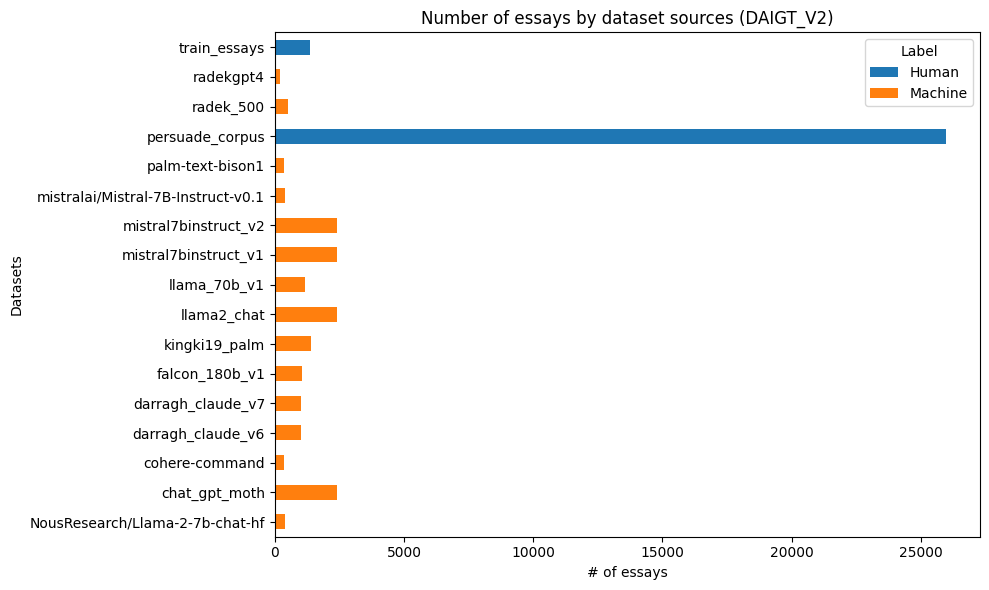

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

grouped_df = df_daigt_train.groupby(['source', 'label']).size().unstack(fill_value=0)

grouped_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title("Number of essays by dataset sources (DAIGT_V2)")
plt.ylabel("Datasets")
plt.xlabel("# of essays")
plt.legend(title='Label', loc='upper right', labels=['Human', 'Machine'])

plt.tight_layout()
plt.show()


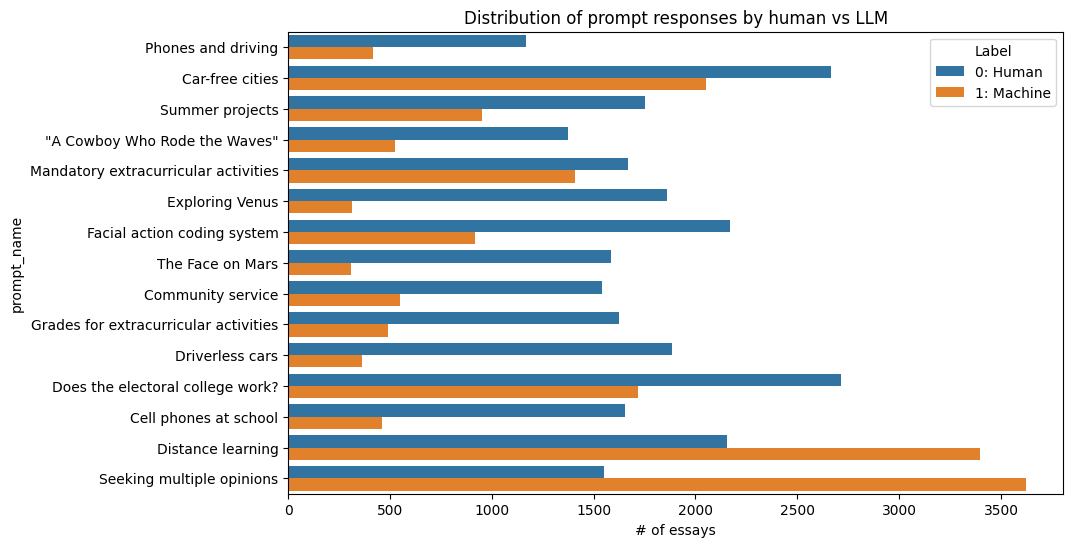

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df_daigt_train, y="prompt_name", hue="label")
plt.title("Distribution of prompt responses by human vs LLM")
plt.xlabel("# of essays")
plt.legend(title='Label', loc='upper right', labels=['0: Human', '1: Machine'])
plt.show()